# STA 208: Homework 1 (Do not distribute)


__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)  This predictor is called the Bayes rule.
2. Suppose that we know that the Bayes rule can be written in the form, 
$$
h_j(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 
3. (Challenging) Suppose that I told you that for any fixed $j$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(h_j) - R(h_j)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
If $p=10$, how many samples would I need to get a classifier $\hat g$, from the previous question (part 2), such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
where $h$ is the Bayes rule, namely, the $h_j$ that minimizes $R$.
(Hint: use the union bound to show that $R_n(\hat g) \approx R(\hat g)$ and use the fact that $R_n(\hat g) \le R_n(h_j)$ for any $j$ because it is in the minimizer.  Remember that $\hat g$ is random and $R_n$ and $\hat g$ are not independent.)

1. The hamming loss will be minimized if $\hat y = y$

      since $g(X) = \hat y$ we would like to force $g(X) = y$. To find this equation that relates our $X$ and $y$ variables we can use the conditional probability equation $f(y|X) = \frac{f_{X,Y}(x,y)}{f(x)}$. This eqation maps our X variable onto our y variable perfectly and is thus a valid solution for our $g(X)$ predictor. This gives
$$
g(X) = \frac{f_{X,Y}(x,y)}{f(x)}\
$$

2. 

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$.  Assume that the KNN algorithm will use the same point as its own nearest neighbor (this is consistent with what you get if you use the same dataset in fit and predict in sklearn.)  You can just write it in words or pseudocode. 
2. Give a simple modification to your algorithm to compute the KNN's $H$ matrix so that a sample does not use its own point.  Derive an expression for the leave-one-out cross validated squared error based on this $H$. You can just write it in words or pseudocode. 
3. For linear regression (with $p < n$ and $X$ is full rank), let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.


4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values, and only the first $r$ columns of $U,V$ would be used.  Let $U_r, V_r$ be the $n \times r$ and $p \times r$ eigenvector matrices.  Call the new $r \times r$ matrix $D_r$ ($r < p$) which just has the top $r$ singular values.  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U_r D_r V_r^\top$.  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ largest singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function (from 1 to $p$).

In [1]:
import numpy as np
import scipy as sc
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,r):
        """
        : Store the rank
        """
        self.r = r
        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        U,D,Vt = np.linalg.svd(X)
        
        # Store unaltered svd values and training data
        self.U = U
        self.D = D
        self.Vt = Vt
        self.X = X
        self.y = y
        
        # Keep only the r largest singular values
        D = self.D[:self.r]
        D_inv = np.linalg.inv(np.diag(D))
        U = U[:, :self.r]
        V = Vt.T
        V = V[:, :self.r]
                
        # Calculate beta using the singular value decomposition
        self.beta = V @ D_inv @ U.T @ y
        
        
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        
        # Predict y hat given the test vector and the beta calculated earlier
        yhat = X_test @ self.beta
        
        return yhat
    
    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        
        # Keep only the r largest singular values
        m,n = self.X.shape
        D = self.D[:r]
        D_inv = np.linalg.inv(np.diag(D))
        V = self.Vt.T[:, :r]
        U = self.U[:, :r]
                
        # Calculate beta using the singular value decomposition
        self.beta = V @ D_inv @ U.T @ self.y
        

In [3]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

In [4]:
X,y,X_test,y_test = gen_LR_data()

# Data preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Add intercept
X_int = np.ones((X.shape[0], 1))
X_test_int = np.ones((X_test.shape[0], 1))
X = np.hstack((X_int, X))
X_test = np.hstack((X_test_int, X_test))

# Train our model using SVD parameters
svr = SingularValueRegressor(r=3)
svr.fit(X,y)
yhat = svr.predict(X_test)

# Change rank
svr.change_rank(4)
yhat = svr.predict(X_test)

In [5]:
p,n = 20, 100

# Store mse values in an array
mse_vals = []

for r in range(1,p+1):
    if r == 1:
        
        # Initialize our singular value regressor class
        svr = SingularValueRegressor(r=r)
        svr.fit(X,y)
        yhat = svr.predict(X_test)
    
    else:
        svr.change_rank(r=r)
        yhat = svr.predict(X_test)
    
    # Calculate mse
    mse = ((yhat - y_test)**2).mean()
    mse_vals.append(mse)

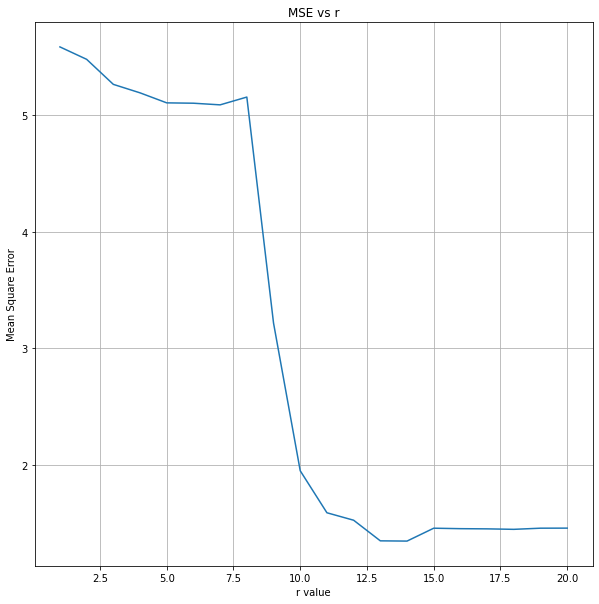

In [6]:
# Plot our mse vals vs our value for r
plt.figure(figsize=(10,10))
plt.plot(range(1,p+1), mse_vals)
plt.xlabel("r value")
plt.ylabel("Mean Square Error")
plt.title("MSE vs r")
plt.grid(True)
plt.show()

__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SingularValueRegressor.  Compare and tune the methods using appropriate testing procedures.  Comment on the tuning of each parameter in ridge, kNN, and SingularValueRegressor in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  

In [7]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import neighbors, linear_model

In [8]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


Some notes for the NAs, you need to replace the NAs somehow to use these methods.  The SimpleImputer will replace the NAs with the mean,median, etc.  You can fit this on the training data and use this to transform for the test set.  We can see that any imputer that is fit only on the training set also can give you that the test error is an unbiased risk estimator.  Let $\hat I$ be the imputer transform and $\hat f$ be any trained predictor.

$$\hat I: R^p \to R^{p}$$
$$\hat f: R^{p} \to R$$

For example,
$(\hat I(x))_j = $ $x_j$ if non-missing and $\hat \mu_j$ if missing 
or you could add a missingness indicator,
$$\hat I_2: R^p \to R^{2p}$$

$(\hat I_2(x))_j = $ $x_j$ if non-missing and $\hat \mu_j$ if missing for $j =1,\ldots,p$

$(\hat I_2(x))_{p+j} = $ $0$ if non-missing and $1$ if missing for $j =1,\ldots,p$

The trained predictor could be linear,
ex. $\hat f(\hat I(x)) = \hat I(x)^\top \hat \beta$

Then we can combine these steps into one predictor,
$\hat g(x) = \hat f (\hat I (x))$.

The test error is still an unbiased risk estimator,
$$\frac{1}{n_t} \sum_{i=n_0+1}^{n_0+n_t} (y_i - \hat g(x_i))^2.$$

In [9]:
# I think the simplest method will be to drop any rows that have an na value in them
print(data_mat.shape)
print(data_mat.isna().sum())
data_mat = data_mat.dropna(axis=0)

# no more na values in our dataset
print(data_mat.isna().sum())

(398, 8)
Y     0
X1    0
X2    0
X3    6
X4    0
X5    0
X6    0
X7    0
dtype: int64
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64


In [10]:
# Split data_mat into x and y variables
y = data_mat["Y"]
X = data_mat.drop(columns=["Y"])

## KNN Parameter Tuning

In [11]:
# Split x and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Scale our data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training ====================>

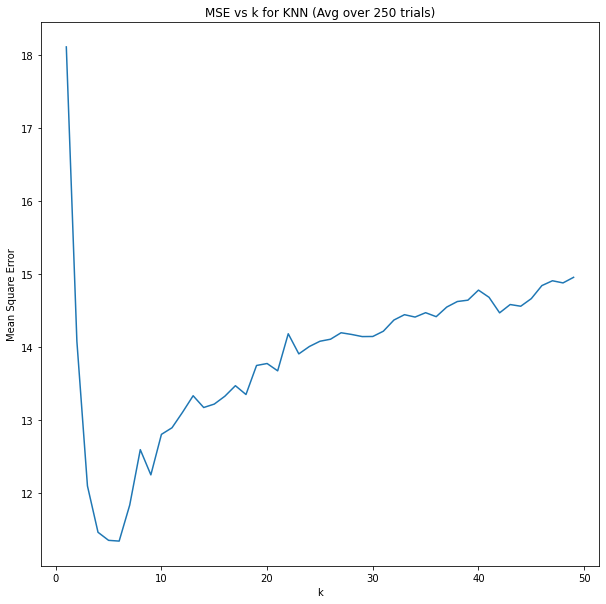

In [12]:
# Training knn again to look for best k on average
total_trials = 250
k_array = np.arange(1, 50, 1)

# Creating a loading bar
bar_len = 20
print("Training >" + "."*bar_len, end="")

for trial in range(0, total_trials):
    
    # Updating our loading bar
    ratio = trial/total_trials
    num_filled = int(np.floor(bar_len*ratio)+1)
    load_bar = "="*num_filled + ">"
    bar_left = "."*(bar_len-num_filled)
    print("\rTraining " + load_bar + bar_left, end="")
    
    # initalize mse array
    mse_val = []
    
    for k in k_array:
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # mse
        mse_val.append(((y_pred - y_test)**2).mean())
        
    if trial == 0:
        total_mse = np.array(mse_val)
    else:
        total_mse = total_mse + np.array(mse_val)
        
# Find avg mse vs k for all trials 
avg_mse = total_mse/trial

plt.figure(figsize=(10,10))
plt.plot(k_array, avg_mse)
plt.xlabel("k")
plt.ylabel("Mean Square Error")
plt.title("MSE vs k for KNN (Avg over 250 trials)")
plt.show()

In [13]:
# Find best value for k
best_k = k_array[np.argwhere(avg_mse == np.min(avg_mse))[0,0]]
print("Optimal value for k is: ", best_k)

Optimal value for k is:  6


## Optimal K value is 6

## Tuning Ridge Regression Parameters

Training ====================>

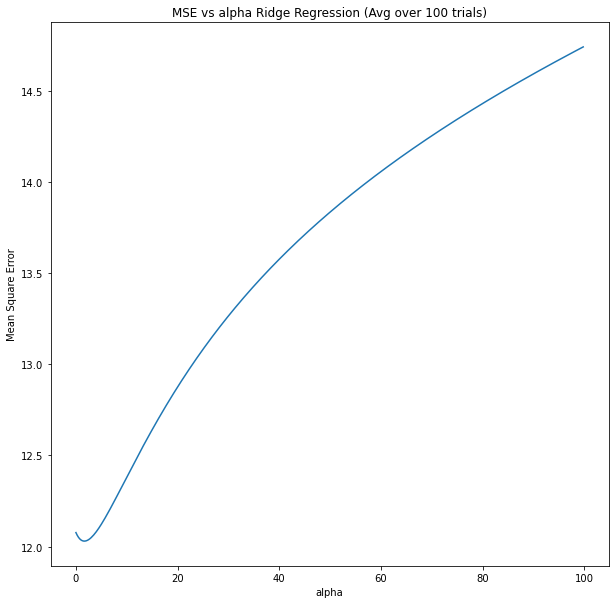

In [14]:
# Keep track of our mse for different values of k
alpha_array = np.arange(0, 100, 0.25)
total_mse = np.zeros_like(alpha_array)
total_trials = 100

# Creating a loading bar
bar_len = 20
print("Training >" + "."*bar_len, end="")

for trial in range(0, total_trials):
    
    # Updating our loading bar
    ratio = trial/total_trials
    num_filled = int(np.floor(bar_len*ratio)+1)
    load_bar = "="*num_filled + ">"
    bar_left = "."*(bar_len-num_filled)
    print("\rTraining " + load_bar + bar_left, end="")
    
    mse_val = []
    
    for alpha in alpha_array:
        ridge = linear_model.Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)

        yhat = ridge.predict(X_test)

        # Calculate mse
        mse_val.append(((yhat - y_test)**2).mean())
    
    if trial == 0:
        total_mse = np.array(mse_val)
    else:
        total_mse = total_mse + np.array(mse_val)

# Average our mse across our total trials
avg_mse = total_mse/trial

plt.figure(figsize=(10,10))
plt.plot(alpha_array, avg_mse)
plt.xlabel("alpha")
plt.ylabel("Mean Square Error")
plt.title("MSE vs alpha Ridge Regression (Avg over 100 trials)")
plt.show()

In [15]:
# Find the best value for alpha
best_alpha = alpha_array[np.argwhere(avg_mse == np.min(avg_mse))[0,0]]
print("Best alpha: ", best_alpha)

Best alpha:  1.75


## Optimal Alpha is 1.75

## Tuning Linear Regression Model


In [16]:
# As far as I know there aren't any parameters to tune, so I will just initialize the model here
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

# Let's find the mse for this model
yhat = ols.predict(X_test)
mse = ((yhat - y_test)**2).mean()
print("MSE for OLS: {:.3f}".format(mse))

MSE for OLS: 11.956


## Tuning Singular Value Regressor

X_train:  (313, 7) 	 X_test:  (79, 7)


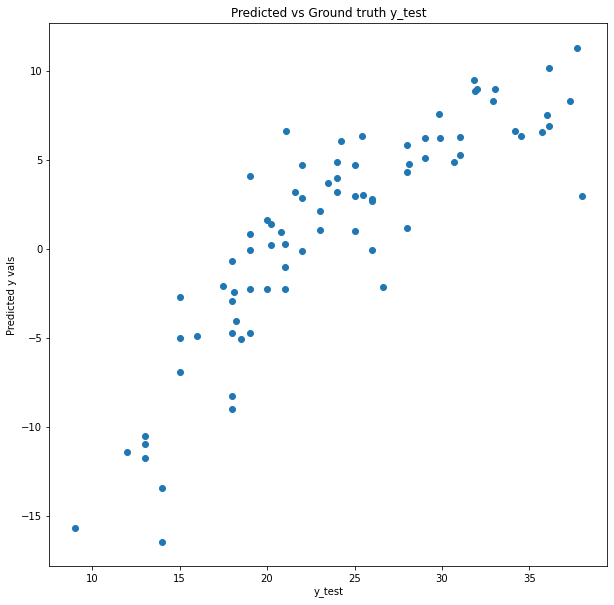

In [17]:
# Singular value regressor
p = X_train.shape[1]
print("X_train: ", X_train.shape, "\t X_test: ", X_test.shape)

svr = SingularValueRegressor(r=p-2)
svr.fit(X_train, y_train)
yhat = svr.predict(X_test)

mse = ((yhat - y_test)**2).mean()

plt.figure(figsize=(10,10))
plt.scatter(y_test, yhat)
plt.xlabel("y_test")
plt.ylabel("Predicted y vals")
plt.title("Predicted vs Ground truth y_test")
plt.show()

In [18]:
# total trials
total_trials = 10
r_range = np.arange(1, X_train.shape[1] + 1, 1)

# Creating a loading bar
bar_len = 20
print("Training >" + "."*bar_len, end="")

for trial in range(0, total_trials):
    
    # Updating our loading bar
    ratio = trial/total_trials
    num_filled = int(np.floor(bar_len*ratio)+1)
    load_bar = "="*num_filled + ">"
    bar_left = "."*(bar_len-num_filled)
    print("\rTraining " + load_bar + bar_left, end="")
    
    mse_val = []
    for r in r_range:
        if r == 1:
            svr = SingularValueRegressor(r)
            svr.fit(X_train, y_train)
            
        else:
            svr.change_rank(r)
            
        yhat = svr.predict(X_test)
        mse_val.append(((yhat-y_test)**2).mean())

    if trial == 0:
        mse_total = np.array(mse_val)
    else:
        mse_total = mse_total + np.array(mse_val)

Training ===================>.

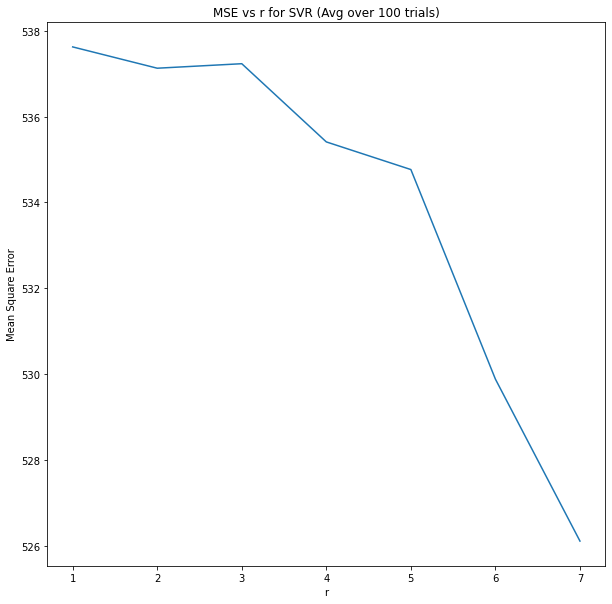

In [19]:
# Find avg mse across all trials
avg_mse = mse_total/total_trials

plt.figure(figsize=(10,10))
plt.plot(r_range, avg_mse)
plt.xlabel("r")
plt.ylabel("Mean Square Error")
plt.title("MSE vs r for SVR (Avg over 100 trials)")
plt.show()